# 0. Вступление

Всем привет! На сегодняшнем семинаре мы познакомимся с библиотекой **PyTorch**. Он очень похож на Numpy, с одним лишь отличием (на самом деле их больше, но сейчас мы поговорим про самое главное) — PyTorch может считать градиенты за вас. Таким образом, вам не надо будет руками писать обратный проход в нейросетях.

#### Семинар построен следующим образом:

1. Вспоминаем Numpy и сравниваем операции в PyTorch
2. Создаем тензоры в PyTorch
3. Работаем с градиентами руками
4. Моя первая нейросеть 

# 1. Вспоминаем Numpy и сравниваем операции в PyTorch

Мы можем создавать матрицы, перемножать их, складывать, транспонировать и в целом совершать любые матричные операции

In [ ]:
import numpy as np 
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

from sklearn.datasets import load_boston
from tqdm.notebook import tqdm

%matplotlib inline

In [ ]:
a = np.random.rand(5, 3) # создали случайную матрицу 
a

array([[0.18799364, 0.67296803, 0.23070234],
       [0.28754354, 0.79704252, 0.13907526],
       [0.06136464, 0.40123741, 0.38462022],
       [0.29562151, 0.31983098, 0.65817163],
       [0.63801667, 0.03029917, 0.42736065]])

In [ ]:
print(f"Проверили размеры: {a.shape}")

Проверили размеры: (5, 3)


In [ ]:
print(f"Добавили 5:\n{a + 5}")

Добавили 5:
[[5.18799364 5.67296803 5.23070234]
 [5.28754354 5.79704252 5.13907526]
 [5.06136464 5.40123741 5.38462022]
 [5.29562151 5.31983098 5.65817163]
 [5.63801667 5.03029917 5.42736065]]


In [ ]:
print(f"X*X^T:\n{a @ a.T}")

X*X^T:
[[0.54145115 0.62252548 0.3702889  0.42265272 0.23892655]
 [0.62252548 0.73729999 0.39093944 0.43145833 0.26704259]
 [0.3702889  0.39093944 0.31268979 0.39961498 0.21568037]
 [0.42265272 0.43145833 0.39961498 0.62287383 0.47957872]
 [0.23892655 0.26704259 0.21568037 0.47957872 0.59062044]]


In [ ]:
print(f"Среднее по колонкам:\n{a.mean(axis=-1)}")

Среднее по колонкам:
[0.363888   0.4078871  0.28240742 0.42454137 0.3652255 ]


In [ ]:
print(f"Изменили размеры: {a.reshape(3, 5).shape}")

Изменили размеры: (3, 5)


## Разминка.

При помощи numpy посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [ ]:
np.sum(np.arange(1, 10001).astype(np.int64)**2)

333383335000

Аналогичные операции в **PyTorch** выглядят следующим образом, синтаксис почти не отличается:

In [ ]:
x = torch.rand(5, 3)
x

tensor([[0.8318, 0.5760, 0.9860],
        [0.9163, 0.7620, 0.7431],
        [0.0232, 0.5026, 0.5968],
        [0.6284, 0.6144, 0.7582],
        [0.4848, 0.3780, 0.2256]])

In [ ]:
print(f"Проверили размеры: {x.shape}")

Проверили размеры: torch.Size([5, 3])


In [ ]:
print(f"Добавили 5:\n{x + 5}")

Добавили 5:
tensor([[5.8318, 5.5760, 5.9860],
        [5.9163, 5.7620, 5.7431],
        [5.0232, 5.5026, 5.5968],
        [5.6284, 5.6144, 5.7582],
        [5.4848, 5.3780, 5.2256]])


In [ ]:
print(f"X*X^T:\n{x @ x.T}")

X*X^T:
tensor([[1.9957, 1.9338, 0.8971, 1.6241, 0.8434],
        [1.9338, 1.9726, 0.8477, 1.6074, 0.8999],
        [0.8971, 0.8477, 0.6092, 0.7758, 0.3359],
        [1.6241, 1.6074, 0.7758, 1.3472, 0.7079],
        [0.8434, 0.8999, 0.3359, 0.7079, 0.4288]])


In [ ]:
print(f"Среднее по колонкам:\n{x.mean(dim=-1)}")

Среднее по колонкам:
tensor([0.7979, 0.8072, 0.3742, 0.6670, 0.3628])


In [ ]:
print(f"Изменили размеры:\n{x.reshape([3, 5]).shape}")

Небольшой пример того, как меняются операции:

* `x.sum(axis=-1) -> x.sum(dim=-1)`
* `x.astype(np.int64) -> x.type(torch.int64)`

Для помощи вам есть [таблица](https://pytorch-for-numpy-users.wkentaro.com/), которая поможет вам найти аналог операции в Numpy.

### Создаем тензоры в PyTorch и снова изучаем базовые операции

In [ ]:
x = torch.empty(5, 3)  # пустой тензор (т.е. без инициализации)
print(x)

tensor([[3.4177e-37, 3.0683e-41, 3.3631e-44],
        [0.0000e+00,        nan, 0.0000e+00],
        [1.1578e+27, 1.1362e+30, 7.1547e+22],
        [4.5828e+30, 1.2121e+04, 7.1846e+22],
        [9.2198e-39, 7.0374e+22, 0.0000e+00]])


In [ ]:
x = torch.rand(5, 3)  # тензор со случайными числами
print(x)

tensor([[0.9285, 0.8980, 0.7019],
        [0.7188, 0.3557, 0.4267],
        [0.6009, 0.1149, 0.3230],
        [0.1673, 0.6227, 0.6459],
        [0.6299, 0.0069, 0.7651]])


In [ ]:
x = torch.zeros(5, 3, dtype=torch.int64)  # тензор с нулями и указанием типов чисел
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [ ]:
x = torch.tensor([5.5, 3])  # конструируем тензор из питоновского листа
print(x)

tensor([5.5000, 3.0000])


In [ ]:
x = torch.randn_like(x, dtype=torch.float32)  # создаем матрицу с размерами как у x
print(x, x.shape)

tensor([ 1.4293, -1.0030]) torch.Size([2])


In [ ]:
x = torch.rand(5, 3)

In [ ]:
y = torch.rand(5, 3)
z = x + y  # операция сложения
print(z)  

tensor([[1.1447, 1.0664, 0.6415],
        [0.1426, 0.5763, 1.4697],
        [1.2023, 0.9810, 1.4114],
        [0.7362, 1.5241, 0.1721],
        [1.1724, 1.8146, 1.4903]])


In [ ]:
z.zero_()  # зануление значений тензора
print(z)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [ ]:
print(x * y)  # поэлементное умножение

tensor([[0.3081, 0.2270, 0.1021],
        [0.0048, 0.0060, 0.5398],
        [0.3012, 0.2074, 0.4804],
        [0.0057, 0.5457, 0.0070],
        [0.3436, 0.8181, 0.5537]])


In [ ]:
print(x @ y.T)  # матричное умножение

tensor([[0.6372, 0.2857, 0.9389, 0.2059, 0.9147],
        [0.7115, 0.5506, 0.8243, 0.4027, 1.0941],
        [0.8733, 0.4679, 0.9891, 0.4508, 1.2729],
        [1.0713, 0.1233, 0.9639, 0.5584, 1.4053],
        [1.1709, 0.6484, 1.4084, 0.5689, 1.7153]])


In [ ]:
print(x.unsqueeze(0).shape)  # добавили измерение в начало, аналог броадкастинга 

torch.Size([1, 5, 3])


In [ ]:
print(x.unsqueeze(0).squeeze(0).shape)  # убрали измерение в начале, аналог броадкастинга 

torch.Size([5, 3])


Мы также можем делать обычные срезы и переводить матрицы назад в numpy:

In [ ]:
a = np.ones((3, 5))
x = torch.ones((3, 5))
print(np.allclose(x.numpy(), a))
print(np.allclose(x.numpy()[:, 1], a[:, 1]))

True
True


# 2. Руками учим линейную регрессию на Numpy и на PyTorch

Для примера возьмём датасет [Boston house prices](https://scikit-learn.org/stable/datasets/toy_dataset.html#boston-dataset), а точнее, его последнюю колонку ("Median value of owner-occupied homes in $1000’s").

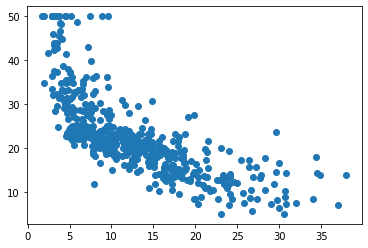

In [ ]:
boston = load_boston()
plt.scatter(boston.data[:, -1], boston.target)

## 2.1 Через Numpy

Для сравнения реализуем линейную регрессию на чистом Numpy.

In [ ]:
w = np.random.rand(1)
b = np.random.rand(1)

x = boston.data[:, -1] / boston.data[:, -1].max()
y = boston.target

Вспомним основные формулы линейной регрессии. Предсказание $\hat y$ и лосс $L$ описываются так:

\begin{align*}
\hat y &= X \cdot w + b \\
L(y, \hat y) &= \frac 1 n \sum_{i = 1}^n (y_i - \hat {y_i})^2 \\
\end{align*}

Производная лосса $L$ по предсказаниям $\hat {y_i}$:

\begin{align*}
\frac {\partial L} {\partial \hat {y_i}} (y, \hat y) &= \frac 2 n (\hat {y_i} - y_i) \\
\end{align*}

Производная предсказаний $\hat {y_i}$ по параметрам $w$, $b$:

\begin{align*}
\frac {\partial \hat {y_i}} {\partial w} &= x_i \\
\frac {\partial \hat {y_i}} {\partial b} &= 1 \\
\end{align*}

Производная лосса $L$ по параметрам $w$, $b$ (chain rule):

\begin{align*}
\frac {\partial L} {\partial w} (y, \hat y) &= \sum_{i = 1}^n \frac 2 n (\hat {y_i} - y_i) x_i \\
\frac {\partial L} {\partial b} (y, \hat y) &= \sum_{i = 1}^n \frac 2 n (\hat {y_i} - y_i) \\
\end{align*}

Напишем функцию, которая по тому, что мы вычисляем во время предсказания, вернёт производные лосса по параметрам:

In [ ]:
def get_grad(w, b, x, y, y_pred, loss):
    w_grad = 2 * np.mean((y_pred - y) * x)
    b_grad = 2 * np.mean(y_pred - y)
    return w_grad, b_grad

Проверим:

In [ ]:
y_pred = w * x + b
loss = np.mean((y - y_pred)**2)
w_grad, b_grad = get_grad(w, b, x, y, y_pred, loss)

print(f"dL/dw = {w_grad}")
print(f"dL/db = {b_grad}")

dL/dw = -12.033740973611508
dL/db = -43.82774368353957


Вспомогательная функция, чтобы рисовать графики во время обучения:

In [ ]:
from IPython.display import clear_output

def log_output(x, y, y_pred, i, loss):
    if (i + 1) % 10 == 0:
        clear_output(True)
        plt.scatter(x, y)
        plt.scatter(x, y_pred, color='orange', linewidth=5)
        plt.show()

        print(f"[Iteration {i}] loss = {loss}")

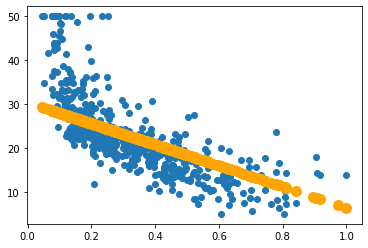

[Iteration 399] loss = 43.70362612513511


In [ ]:
num_iters = 400

for i in range(num_iters):
    y_pred = w * x + b
    loss = np.mean((y - y_pred)**2)
    
    w_grad, b_grad = get_grad(w, b, x, y, y_pred, loss)

    # делаем шаг градиентного спуска с lr = 0.05
    w -= 0.05 * w_grad
    b -= 0.05 * b_grad

    log_output(x, y, y_pred, i, loss)
    
    if loss < 0.5:
        print("Done!")
        break

## 3.2 Через PyTorch

Сразу сконвертируем датасет в `torch.Tensor`, чтобы об этом дальше не думать:

In [ ]:
x = torch.tensor(boston.data[:, -1] / boston.data[:, -1].max(), dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

В PyTorch есть возможность при создании тензора указывать, нужно ли считать по нему градиент или нет, с помощью параметра `requires_grad`. Когда `requires_grad=True` мы сообщаем фреймворку, о том, что мы хотим следить за всеми тензорами, которые получаются из созданного. Иными словами, у любого тензора, у которого указан данный параметр, будет доступ к цепочке операций и преобразований совершенными с ними. Если эти функции дифференцируемые, то у тензора появляется параметр `.grad`, в котором хранится значение градиента.

Если к тензору, получающемуся в результате, применить метод `.backward()`, то фреймворк посчитает по цепочке градиенту для всех тензоров, у которых `requires_grad=True`.

In [ ]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

assert w.grad is None # только создали тензоры и в них нет градиентов
assert b.grad is None

In [ ]:
# совершаем операции с тензорами
y_pred = w * x + b
loss = torch.mean((y_pred - y)**2)  # подсказка: используйте torch.mean()
loss

tensor(550.4773, grad_fn=<MeanBackward0>)

Обратите внимание на `grad_fn` у `loss`. Наличие этого атрибута говорит о том, что тензор является частью вычислительного графа, а последней операцией, совершённой с этим тензором, был `mean()`.

In [ ]:
loss.backward() # считаем градиенты

In [ ]:
assert w.grad is not None  # сделали операции и посчитали градиенты, значение должно было появиться
assert b.grad is not None

assert isinstance(w.grad, torch.Tensor)  # градиент — это тоже тензор
assert isinstance(b.grad, torch.Tensor)

print(f"dL/dw = {w.grad}")
print(f"dL/db = {b.grad}")

dL/dw = tensor([-11.7468])
dL/db = tensor([-43.0744])


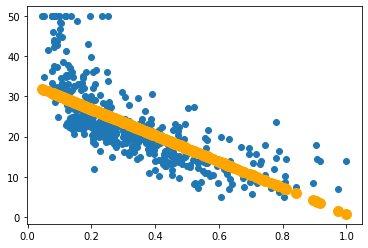

[Iteration 399] loss = 38.89793014526367


In [ ]:
num_iters = 400

for i in range(num_iters):
    y_pred = w * x + b
    loss = torch.mean((y_pred - y)**2)
    loss.backward()

    # отключаем вычисление градиентов на то время, пока мы руками лезем в .grad
    with torch.no_grad():
        # делаем шаг градиентного спуска с lr = 0.05
        w -= 0.05 * w.grad
        b -= 0.05 * b.grad

        # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их
        w.grad.zero_()
        b.grad.zero_()

    # PyTorch запрещает вызывать .numpy() на тензорах, у которых requires_grad=True, поэтому
    # вначале делаем копию тензора при помощи .detach()
    log_output(x.numpy(), y.numpy(), y_pred.detach().numpy(), i, loss.detach().numpy())
    
    if loss.detach().numpy() < 0.5:
        print("Done!")
        break

## 3.3 `torch.optim`, criterion

В PyTorch есть много разных инструментов для вычисления и оптимизации функций. Здесь мы познакомимся с двумя:

* Оптимизаторы. Они все лежат в `torch.optim.*`: например, `torch.optim.SGD`, `torch.optim.Adam`, etc.
* Criterions, они же лоссы.

In [ ]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

Оптимизатор создаётся так:

In [ ]:
opt = torch.optim.SGD([w, b], lr=0.05)

Методы оптимизатора реализует те две операции, которые мы раньше делали руками:

* Обновление параметров: `opt.step()`
* Зануление сохранённых градиентов: `opt.zero_grad()`

Criterion — это штука, которая считает лосс. У них есть два разных интерфейса: объектно-ориентированный (`torch.nn.*`) и функциональный (`torch.nn.functional.*`). Пользоваться объектно-ориентированным интерфейсом можно так:

In [ ]:
criterion = nn.MSELoss()
y_pred = w * x + b
print(criterion(y_pred, y))

tensor(575.0103, grad_fn=<MseLossBackward>)


То же самое, но с функциональным интерфейсом:

In [ ]:
print(F.mse_loss(y_pred, y))

tensor(575.0103, grad_fn=<MseLossBackward>)


Теперь применим всё это:

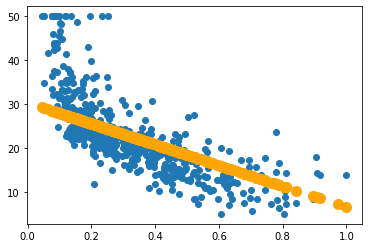

[Iteration 399] loss = 43.84434509277344


In [ ]:
num_iters = 400

for i in range(num_iters):
    y_pred = w * x + b
    loss = criterion(y_pred, y)
    loss.backward()
    
    # Обновите параметры при помощи только что посчитанных градиентов...
    opt.step()
    
    # ...и занулите тензоры с градиентами
    opt.zero_grad()

    log_output(x.numpy(), y.numpy(), y_pred.detach().numpy(), i, loss.detach().numpy())
    
    if loss.detach().numpy() < 0.5:
        print("Done!")
        break

## 3.4 `torch.utils.data.{Dataset,DataLoader}`

Чтобы в PyTorch иметь возможность итерироваться по данным и применять к ним преобразования, например, аугментации, о которых вы узнаете позже, нужно создать свой класс, унаследованный от `torch.utils.data.Dataset`.

Вот пример из документации:

```python
class FaceLandmarksDataset(torch.utils.data.Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample
```

Как вы видите, у такого класса должно быть два метода: 

* `__len__`: возвращает информацию о том, сколько объектов у нас в датасете
* `__getitem__`: возвращает семпл и таргет к нему


Теперь давайте напишем такой сами. В качестве датасета снова возьмём последнюю колонку из Boston house prices.

In [ ]:
class OurDataset(torch.utils.data.Dataset):
    """Our dataset"""
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return {
            'sample': torch.tensor(self.x[idx], dtype=torch.float32),
            'target': torch.tensor(self.y[idx], dtype=torch.float32),
        }

In [ ]:
our_dataset = OurDataset(x=boston.data[:, -1] / boston.data[:, -1].max(), y=boston.target)

In [ ]:
our_dataset[1]  # [1] под капотом вызывает .__getitem__(1)

{'sample': tensor(0.2407), 'target': tensor(21.6000)}

Нам хотелось бы избежать необходимости во время обучения нейросети целиком прогонять через неё все примеры из обучающей выборки одновременно. Для этого датасет нарезают на батчи — кусочки по несколько элементов — и прогоняют их через нейросеть по одному. Сделать это на чистом питоне можно примерно так:

In [ ]:
batch_size = 64

for start_idx in range(0, len(our_dataset), batch_size):
    batch = our_dataset[start_idx:start_idx + batch_size]
    batch_x = batch['sample']
    batch_y = batch['target']
    print('Sample:', batch_x)
    print('Target:', batch_y)
    
    break

Sample: tensor([0.1312, 0.2407, 0.1061, 0.0774, 0.1404, 0.1372, 0.3274, 0.5043, 0.7883,
        0.4504, 0.5386, 0.3495, 0.4137, 0.2175, 0.2702, 0.2231, 0.1733, 0.3864,
        0.3079, 0.2971, 0.5536, 0.3642, 0.4930, 0.5236, 0.4293, 0.4348, 0.3900,
        0.4551, 0.3371, 0.3155, 0.5952, 0.3434, 0.7298, 0.4833, 0.5357, 0.2549,
        0.3005, 0.2310, 0.2668, 0.1138, 0.0521, 0.1275, 0.1530, 0.1959, 0.2515,
        0.2689, 0.3727, 0.4951, 0.8114, 0.4267, 0.3542, 0.2484, 0.1391, 0.2220,
        0.3898, 0.1267, 0.1520, 0.1040, 0.1807, 0.2428, 0.3463, 0.3803, 0.1772,
        0.2502])
Target: tensor([24.0000, 21.6000, 34.7000, 33.4000, 36.2000, 28.7000, 22.9000, 27.1000,
        16.5000, 18.9000, 15.0000, 18.9000, 21.7000, 20.4000, 18.2000, 19.9000,
        23.1000, 17.5000, 20.2000, 18.2000, 13.6000, 19.6000, 15.2000, 14.5000,
        15.6000, 13.9000, 16.6000, 14.8000, 18.4000, 21.0000, 12.7000, 14.5000,
        13.2000, 13.1000, 13.5000, 18.9000, 20.0000, 21.0000, 24.7000, 30.8000,
       

В PyTorch такую функциональность предоставляет класс `DataLoader`. Вообще, он умеет делать много чего помимо этого, но нас сейчас интересует именно его способность резать датасет на батчи. Пользоваться им можно так:

In [ ]:
dataloader = torch.utils.data.DataLoader(our_dataset, batch_size=64)

for batch in dataloader:
    batch_x = batch['sample']
    batch_y = batch['target']
    print('Sample:', batch_x)
    print('Target:', batch_y)

    break

Sample: tensor([0.1312, 0.2407, 0.1061, 0.0774, 0.1404, 0.1372, 0.3274, 0.5043, 0.7883,
        0.4504, 0.5386, 0.3495, 0.4137, 0.2175, 0.2702, 0.2231, 0.1733, 0.3864,
        0.3079, 0.2971, 0.5536, 0.3642, 0.4930, 0.5236, 0.4293, 0.4348, 0.3900,
        0.4551, 0.3371, 0.3155, 0.5952, 0.3434, 0.7298, 0.4833, 0.5357, 0.2549,
        0.3005, 0.2310, 0.2668, 0.1138, 0.0521, 0.1275, 0.1530, 0.1959, 0.2515,
        0.2689, 0.3727, 0.4951, 0.8114, 0.4267, 0.3542, 0.2484, 0.1391, 0.2220,
        0.3898, 0.1267, 0.1520, 0.1040, 0.1807, 0.2428, 0.3463, 0.3803, 0.1772,
        0.2502])
Target: tensor([24.0000, 21.6000, 34.7000, 33.4000, 36.2000, 28.7000, 22.9000, 27.1000,
        16.5000, 18.9000, 15.0000, 18.9000, 21.7000, 20.4000, 18.2000, 19.9000,
        23.1000, 17.5000, 20.2000, 18.2000, 13.6000, 19.6000, 15.2000, 14.5000,
        15.6000, 13.9000, 16.6000, 14.8000, 18.4000, 21.0000, 12.7000, 14.5000,
        13.2000, 13.1000, 13.5000, 18.9000, 20.0000, 21.0000, 24.7000, 30.8000,
       

Воспользуемся этим даталоадером и проитерируемся по датасету батчами:

In [ ]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)
opt = torch.optim.SGD([w, b], lr=0.05)

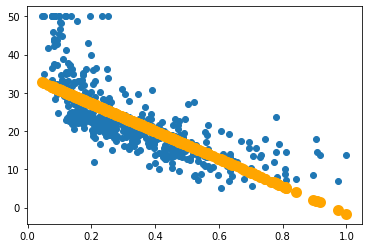

[Iteration 199] loss = 38.51005554199219


In [ ]:
num_iters = 200

for i in range(num_iters):
    for batch in dataloader:
        x_batch = batch['sample']
        y_batch = batch['target']
        y_pred = w * x_batch + b
        loss = F.mse_loss(y_pred, y_batch)
        loss.backward()

        opt.step()
        opt.zero_grad()

    # Чтобы нарисовать график, здесь мы всё равно прогоним весь датасет целиком через линейную регрессию.
    # С большими датасетами и большими моделями это не получилось бы, и пришлось бы собирать метрики, прогоняя
    # датасет через модель батчами.
    y_pred = w * x + b
    loss = F.mse_loss(y_pred, y)
    log_output(x.numpy(), y.numpy(), y_pred.detach().numpy(), i, loss.detach().numpy())
    
    if loss.detach().numpy() < 0.5:
        print("Done!")
        break

# 4. Менее игрушечный пример

## 4.1 Скачиваем датасет

Возьмём чуть более серьёзный датасет, чем последняя колонка Boston house prices. Например, MNIST:

In [ ]:
# Чтобы сайт, на котором выложен датасет, не принял нас за ботов, прикинемся браузером

import urllib

opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [ ]:
from pathlib import Path
from torch.hub import _get_torch_home

# На Linux датасет скачается в ~/.cache/torch/datasets, но можете выбрать любую другую папку
mnist_path = Path(_get_torch_home()) / 'datasets'

mnist_train = torchvision.datasets.MNIST(
    mnist_path, train=True, download=True,
    transform=torchvision.transforms.ToTensor()
) # используем готовый класс от торча для загрузки данных для тренировки
mnist_valid = torchvision.datasets.MNIST(
    mnist_path, train=False, download=True,
    transform=torchvision.transforms.ToTensor()
) # используем готовый класс от торча для загрузки данных для валидации


Extracting /root/.cache/torch/datasets/MNIST/raw/train-images-idx3-ubyte.gz to /root/.cache/torch/datasets/MNIST/raw




Extracting /root/.cache/torch/datasets/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.cache/torch/datasets/MNIST/raw




Extracting /root/.cache/torch/datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.cache/torch/datasets/MNIST/raw




Extracting /root/.cache/torch/datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.cache/torch/datasets/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


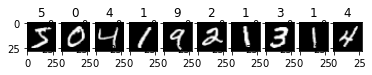

In [ ]:
n = 10
for i in range(n):
    plt.subplot(1, n, i + 1)
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]), cmap='gray')
    plt.title(str(mnist_train[i][1]))
plt.show()

Датасет довольно большой:

In [ ]:
len(mnist_train), len(mnist_valid)

(60000, 10000)

Заведём даталоадеры для MNIST. Параметр `num_workers=1` означает, что даталоадер создаст 1 дочерний процесс, который будет заниматься в фоне загрузкой датасета в память и заполнением очереди из батчей:

In [ ]:
train_dataloader = torch.utils.data.DataLoader(
    mnist_train, batch_size=4, shuffle=True, num_workers=1
)

valid_dataloader = torch.utils.data.DataLoader(
    mnist_valid, batch_size=4, shuffle=False, num_workers=1
)

## 4.2 Собираем нейросеть

В общем случае в PyTorch для создания нейросетей используется модуль `nn`. Нейросеть должна быть унаследована от класса `nn.Module`. Пример, как это может выглядеть:

```python
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(784, 30)
        self.fc2 = nn.Linear(30, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        return self.fc2(x)
```

Как мы видим на этом примере, у данного класса должно быть метод `forward`, который определяет прямой проход нейросети. Также из класса выше видно, что модуль `nn` содержит в себе реализацию большинства слоев, а модуль `nn.functional` -- функций активаций.

Есть еще один способ создать нейросеть, если она представляет собой последовательное применение слоёв. Разберем его на практике:

In [ ]:
model = nn.Sequential(  # создаем контейнер, который инициализируем списком слоёв
    nn.Linear(5, 3),    # добавили слой с 3 нейронами на выходе и 5 входами
    nn.ReLU(),          # добавили функцию активации
    nn.Linear(3, 1),    # добавили слой с 1 нейроном с 3 входами
)

In [ ]:
batch_x = torch.randn((2, 5))
y_pred = model(batch_x) # получили предсказания модели
y_pred

tensor([[-0.6540],
        [-0.6666]], grad_fn=<AddmmBackward>)

Обратите внимание на `grad_fn`. Тензор `y_pred` помнит про то, что последней операцией в его вычислительном графе была [`addmm`](https://pytorch.org/docs/stable/generated/torch.addmm.html), то есть (упрощая) `b + m @ x`. Это соответствует `nn.Linear` в конце модели!

Соберём теперь модель, подходящую для MNIST:

In [ ]:
model = nn.Sequential(
    nn.Flatten(),         # превращаем картинку 28х28 в вектор размером 784
    nn.Linear(784, 128),  # входной слой размером 784 нейронов с выходом в 128 нейронов
    nn.ReLU(),            # функция активации релу
    nn.Linear(128, 10),   # ещё один линейный слой
)

Посмотрите внимательно: мы сейчас будем заниматься классификацией, но в конце модели нет никакого софтмакса! Как так?

Дело в том, что поскольку во время обучения мы будем оптимизировать negative log likelihood, после softmax в функции потерь будет сразу стоять логарифм. Последовательное вычисление сначала softmax, а потом его логарифма может приводить к большим ошибкам округления, поэтому обычно эти две функции соединяют в композицию `log_softmax`, которая ведёт себя гораздо лучше:

$$
\log \left[ \operatorname{softmax}(x) \right]_i =
\log \left( \frac {\exp(x_i)} {\sum_{j=1}^n \exp(x_j)} \right) =
x_i - \log\left( \sum_{j=1}^n \exp(x_j) \right) =
x_i - \log\left( \sum_{j=1}^n \exp(x_j - x_* + x_*) \right) =
x_i - x_* - \log\left( \sum_{j=1}^n \exp(x_j - x_*) \right),
$$

где $x_* = \max \left\{ x_i \right\}$.

Поэтому мы можем:

* Либо поставить на выход модели функцию активации `log_softmax` и учить её с функцией потерь negative log likelihood (в PyTorch она называется `nn.NLLLoss` или `F.nll_loss`),
* Либо оставить модель безо всякой функции активации в конце и учить её с функцией потерь `nll_loss(log_softmax())`. В PyTorch такая композитная функция потерь называется `nn.CrossEntropyLoss` или `F.cross_entropy`, ей мы и воспользуемся.

А когда мы захотим предсказать классы, будет достаточно просто посчитать `argmax(model(), dim=-1).`

## 4.3 Training loop

Веса моделей хранятся в виде матриц и выглядят так:

In [ ]:
[x for x in model.parameters()]

[Parameter containing:
 tensor([[ 0.0160,  0.0121, -0.0254,  ...,  0.0273,  0.0193, -0.0220],
         [ 0.0098,  0.0342, -0.0196,  ...,  0.0052,  0.0193, -0.0272],
         [ 0.0282,  0.0140, -0.0244,  ...,  0.0258, -0.0039,  0.0077],
         ...,
         [ 0.0184,  0.0024, -0.0261,  ..., -0.0081,  0.0250, -0.0028],
         [-0.0207, -0.0180, -0.0037,  ...,  0.0301,  0.0132, -0.0208],
         [ 0.0141,  0.0024,  0.0153,  ...,  0.0074, -0.0033, -0.0183]],
        requires_grad=True), Parameter containing:
 tensor([ 0.0198, -0.0043,  0.0173, -0.0018,  0.0172, -0.0265, -0.0276,  0.0018,
          0.0075,  0.0095,  0.0221,  0.0098,  0.0305,  0.0264, -0.0267,  0.0024,
          0.0013,  0.0160,  0.0118,  0.0067,  0.0008, -0.0270,  0.0019, -0.0277,
         -0.0279,  0.0096, -0.0241, -0.0314,  0.0040,  0.0061, -0.0103, -0.0045,
         -0.0170, -0.0289,  0.0235, -0.0304,  0.0276, -0.0236,  0.0305,  0.0246,
          0.0189, -0.0105,  0.0051, -0.0237,  0.0245,  0.0119, -0.0209,  0.0069,

In [ ]:
[p.shape for p in model.parameters()]

[torch.Size([128, 784]),
 torch.Size([128]),
 torch.Size([10, 128]),
 torch.Size([10])]

In [ ]:
opt = torch.optim.SGD(model.parameters(), lr=0.05) # создаем оптимизатор и передаем туда параметры модели
criterion = nn.CrossEntropyLoss()

In [ ]:
for epoch in range(1, 11):  # всего у нас будет 10 эпох (10 раз подряд пройдемся по всем батчам из трейна)
    # Трейн
    for x_batch, y_batch in tqdm(train_dataloader, desc=f'Epoch {epoch} | Train'):
        y_pred = model(x_batch) # делаем предсказания
        loss = criterion(y_pred, y_batch) # считаем лосс
        
        ############################## Собственно обучение ##############################
        # 1. Считаем градиенты
        loss.backward()
        
        # 2. Обновляем параметры сети
        opt.step()
        
        # 3. Обнуляем посчитанные градиенты параметров. Забыть про это — частая ошибка!
        opt.zero_grad()
        #################################################################################

    # Валидация на каждой второй эпохе
    if epoch % 2 == 0:
        valid_losses = [] # сюда будем складывать средний лосс по батчам
        valid_accuracies = []
        # мы считаем качество, поэтому мы запрещаем фреймворку считать градиенты по параметрам
        with torch.no_grad():
            for x_batch, y_batch in tqdm(valid_dataloader, desc=f'Epoch {epoch} | Valid'):
                y_pred = model(x_batch) # делаем предсказания
                loss = criterion(y_pred, y_batch) # считаем лосс
                valid_losses.append(loss.numpy()) # добавляем в массив
                valid_accuracies.extend((torch.argmax(y_pred, dim=-1) == y_batch).numpy().tolist())

        # выводим статистику
        valid_accuracy = np.mean(valid_accuracies)
        print(f'Epoch: {epoch}, loss: {np.mean(valid_losses):.5f}, accuracy: {valid_accuracy}')
        if valid_accuracy > 0.975:
            print('Done!')
            break


Epoch: 2, loss: 0.10096, accuracy: 0.9687



Epoch: 4, loss: 0.11146, accuracy: 0.97


KeyboardInterrupt: ignored

Посмотрим, что эта модель предсказывает:

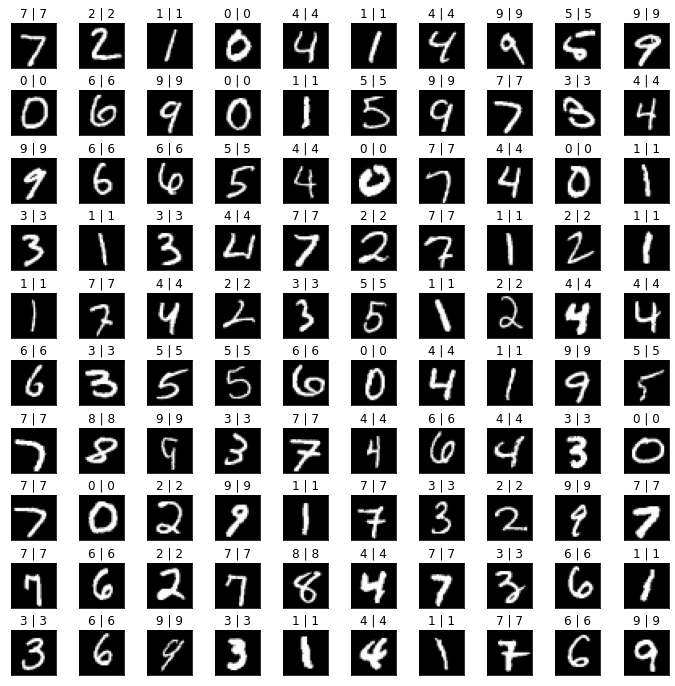

In [ ]:
rows = 10
cols = 10

f, axarr = plt.subplots(rows, cols, figsize=(12, 12))

for i in range(rows):
    for j in range(cols):
        idx = i * cols + j
        axarr[i, j].imshow(mnist_valid[idx][0].squeeze(0).numpy().reshape([28, 28]), cmap='gray')
        y_true = mnist_valid[idx][1]
        y_pred = torch.argmax(model(mnist_valid[idx][0]).squeeze(0), dim=-1).numpy()
        axarr[i, j].set_title(f'{y_true} | {y_pred}', color='black' if y_true == y_pred else 'red')

for ax in f.axes:
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
f.subplots_adjust(hspace=0.5)
plt.show()

### Дополнительные материалы:

* [PyTorch за 60 минут](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* [Использование PyTorch на GPU](https://pytorch.org/docs/master/notes/cuda.html)
* [Хорошая книга про PyTorch](https://pytorch.org/assets/deep-learning/Deep-Learning-with-PyTorch.pdf)

### Credits

Этот ноутбук основан на [ноутбуке](https://github.com/hse-ds/iad-deep-learning/blob/86313e3/sem01/sem01.ipynb) первого семинара курса по ИДА в Вышке, который, в свою очередь, основан на вводном [ноутбуке](https://github.com/yandexdataschool/Practical_DL/blob/fall20/week02_autodiff/seminar_pytorch.ipynb) второй недели курса по Deep Learning в ШАДе.